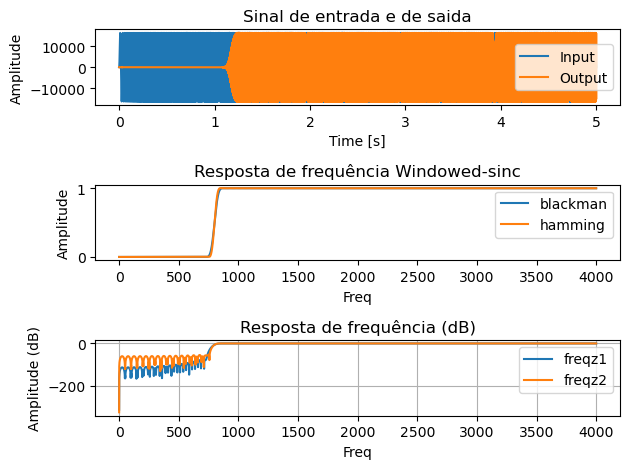

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sf

#Frequencia de amostragem
Fs = 8000

# definindo a frequencia de corte
# tem que estar entre 0 e 0.5
fc = float((800)/Fs)

# definindo o tamanho da amostra
M = 320

# constant K
K = 1

# -M/2 to M/2
i1 = np.arange(10**-9, M, 1.)


# Equação 16-4 do livro
h1 = K * (np.sin(2*np.pi*fc*(i1-M/2))/(i1-M/2)) * (0.42 - 0.5*np.cos(2*np.pi*i1/M) + 0.08*np.cos(4*np.pi*i1/M))

# Normaliza o filtro
h1 = h1 / np.sum(h1)

#Inicializa um vetor do tamanho do filtro com 0
h2 = np.zeros(M)


for ind in range(int(M)):
    if (ind-M/2) == 0:
        h2[ind] = 2*np.pi*fc
    else:
        h2[ind] = np.sin(2*np.pi*fc*(ind-M/2))/(ind-M/2)
    h2[ind] = h2[ind] * (0.54 - 0.46*np.cos(2*np.pi*ind/M))

# Normaliza o filtro
h2 = h2 / np.sum(h2)

# Obtem o filtro passa alta atraves da inversão espectral
h1 = -h1
h1[int(M/2)] += 1

h2 = -h2
h2[int(M/2)] += 1

# salva coeficientes
nome_arq_coefs = "coefPA.dat"
with open(nome_arq_coefs, 'w') as f:
    for d in h2:
        f.write(str(d.astype(np.float16))+",\n")


read_path = "sweep.pcm"
with open(read_path, 'rb') as f:
    buf = f.read()
    data_i = np.frombuffer(buf, dtype='int16')
    data_len = len(data_i)

    # replica do arquivo lido para salvar o resultado
    data_o = np.convolve(h2, data_i)
    data_o = data_o.astype(dtype='int16')


# amostra de 100 ms
t = np.arange(0, data_len/Fs, 1 / Fs)


# Plotando os gráficos
#Visualizando dados de entrada e saida
plt.subplot(3, 1, 1)
plt.title("Sinal de entrada e de saida")
plt.plot(t, data_i[: len(t)], label="Input")
plt.plot(t, data_o[: len(t)], label="Output")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")


[w1, h1] = sf.freqz(h1, worN = Fs, fs = Fs)
[w2, h2] = sf.freqz(h2, worN = Fs, fs = Fs)

plt.subplot(3, 1, 2)
plt.title("Resposta de frequência Windowed-sinc")
plt.plot(w1, abs(h1), label="blackman")
plt.plot(w2, abs(h2), label="hamming")
plt.legend()
plt.xlabel("Freq")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 3)
plt.title("Resposta de frequência (dB)")
plt.plot(w1, 20 * np.log10(abs(h1)), label="freqz1")
plt.plot(w2, 20 * np.log10(abs(h2)), label="freqz2")
plt.legend()
plt.xlabel("Freq")
plt.ylabel("Amplitude (dB)")


file_name = "sweepPASaida.pcm"
with open(file_name, 'wb') as f:
    for d in data_o:
        f.write(d)
        
plt.tight_layout()
plt.grid()
plt.show()
